# Trabajo Práctico 7
Desarrollar un aplicativo que implemente las siguientes funciones:
*  Downsampling X2 (mostrando la imagen resultado al doble de tamaño para 
comparar el efecto) utilizando kernel constante, bilineal, y bicúbico.
*  Upsampling X2 (mostrando la imagen original al doble de tamaño para comparar el efecto) utilizando kernel constante, bilineal, y bicúbico.
* Cuantización a cantidad de niveles de gris variable, utilizando uniforme, 
dithering aleatorio, y difusión del error por scan-line.


In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

Genero una función que transforma la imagen desde el espacio RGB al YIQ.

In [2]:
def rgb_to_yiq (rgb):
    yiq = np.zeros(rgb.shape)
    yiq[:,:,0] = 0.299*rgb[:,:,0] + 0.587*rgb[:,:,1] + 0.114*rgb[:,:,2]
    yiq[:,:,1] = 0.595716*rgb[:,:,0] - 0.274453*rgb[:,:,1] - 0.321263*rgb[:,:,2]
    yiq[:,:,2] = 0.211456*rgb[:,:,0] - 0.522591*rgb[:,:,1] + 0.311135*rgb[:,:,2]
    #yiq[:,:,3] = rgb[:,:,3]
    return yiq

Genero una función que realiza un downsampling constante sobre la matriz de la banda Y.

In [3]:
def down_un (yiq):
    yiq_down = np.zeros(((yiq.shape[0]//2),(yiq.shape[1]//2)))
    for x in range (yiq_down.shape[0]):
        for y in range (yiq_down.shape[1]):
            yiq_down[x][y] = yiq[2*x,2*y]
    return yiq_down

Genero una función que realiza un downsampling bilineal sobre la matriz de la banda Y.

In [4]:
def down_bilineal (yiq):
    yiq_down = np.zeros(((yiq.shape[0]//2),(yiq.shape[1]//2)))
    for x in range (yiq_down.shape[0]):
        for y in range (yiq_down.shape[1]):
            yiq_down[x][y] = (yiq[x*2,y*2] + yiq[1+x*2,y*2] + yiq[x*2,1+y*2] + yiq[1+x*2,1+y*2])/4
    return yiq_down

Genero una función que realiza un downsampling cúbico sobre la matriz de la banda Y.

In [5]:
def down_cubic (yiq):
    yiq_down = np.zeros(((yiq.shape[0]//2)-1,(yiq.shape[1]//2)-1))
    for x in range (yiq_down.shape[0]):
        for y in range (yiq_down.shape[1]):
            yiq_down[x][y] = (yiq[x*2-1,y*2-1] + yiq[x*2,y*2-1] + yiq[x*2+1,y*2-1] + yiq[x*2+2,y*2-1] +\
                              yiq[x*2-1,y*2] + yiq[x*2,y*2] + yiq[x*2+1,y*2] + yiq[x*2+2,y*2] +\
                              yiq[x*2-1,y*2+1] + yiq[x*2,y*2+1] + yiq[x*2+1,y*2+1] + yiq[x*2+2,y*2+1] +\
                              yiq[x*2-1,y*2+2] + yiq[x*2,y*2+2] + yiq[x*2+1,y*2+2] + yiq[x*2+2,y*2+2])/16
    return yiq_down

Genero una función que realiza un upsampling constante sobre la matriz de la banda Y.

In [6]:
def up_un (yiq):
    yiq_up = np.zeros(((yiq.shape[0]*2),(yiq.shape[1]*2)))
    for x in range (yiq_up.shape[0]):
        for y in range (yiq_up.shape[1]):
            yiq_up[x][y] = yiq[x//2,y//2]
    return yiq_up

Genero una función que realiza un upsampling bilineal sobre la matriz de la banda Y.

In [7]:
def up_bilineal (yiq):
    yiq_up = np.zeros(((yiq.shape[0]*2),(yiq.shape[1]*2)))
    for x in range (yiq_up.shape[0]):
        for y in range (yiq_up.shape[1]):
            yiq_up[x][y] = (yiq[x//2-1,y//2-1] + yiq[x//2-1,y//2] + yiq[x//2,y//2-1] + yiq[x//2,y//2])/4
    return yiq_up

Genero una función que realiza un downsampling cúbico sobre la matriz de la banda Y.

In [8]:
def up_cubico (yiq):
    yiq_up = np.zeros(((yiq.shape[0]*2)-2,(yiq.shape[1]*2)-2))
    for x in range (yiq_up.shape[0]):
        for y in range (yiq_up.shape[1]):
            yiq_up[x][y] = (yiq[x//2-2,y//2-2] + yiq[x//2-1,y//2-2] + yiq[x//2,y//2-2] + yiq[x//2+1,y//2-2] +\
                            yiq[x//2-2,y//2-1] + yiq[x//2-1,y//2-1] + yiq[x//2,y//2-1] + yiq[x//2+1,y//2-1] +\
                            yiq[x//2-2,y//2] + yiq[x//2-1,y//2] + yiq[x//2,y//2] + yiq[x//2+1,y//2] +\
                            yiq[x//2-2,y//2+1] + yiq[x//2-1,y//2+1] + yiq[x//2,y//2+1] + yiq[x//2+1,y//2+1])/16
    return yiq_up

Genero una función que realiza la cuantización a distintos niveles de gris sobre la matriz de la banda Y.

In [9]:
def cuant_un (yiq,n):
    un_yiq = np.zeros(((yiq.shape[0],yiq.shape[1])))
    for i in range (un_yiq.shape[0]):
        for j in range (un_yiq.shape[1]):
            un_yiq[i][j] = np.round((yiq[i][j])*(n-1))/(n-1)
    return un_yiq

Genero una función que aplica una cuantización por dithering aleatorio sobre la matriz de la banda Y.

In [10]:
def dithering (yiq,n):
    dit_yiq = np.zeros(((yiq.shape[0]),(yiq.shape[1])))
    for i in range (dit_yiq.shape[0]):
        for j in range (dit_yiq.shape[1]):
            dit_yiq[i][j] = np.round(yiq[i][j]*(n-1)+np.random.rand()-0.5)/(n-1)
    return dit_yiq

Genero una función que aplica una cuantización por difusión del error por scan-line sobre la matriz de la banda Y.

In [11]:
def difusion (yiq,n):
    dif_yiq = np.zeros(((yiq.shape[0]),(yiq.shape[1])))
    for i in range(dif_yiq.shape[0]):
        error = 0
        for j in range(dif_yiq.shape[1]):
            dif_yiq[i][j] = (np.round(yiq[i][j]*(n-1)+error)/(n-1))
            error += yiq[i][j] - dif_yiq[i][j]
    return dif_yiq

# Bloque Principal
Leo la imagen original en RGB, la normalizo y luego se transforma al espacio YIQ.

(300, 451, 3)
(300, 451)


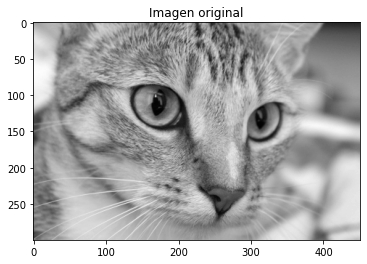

In [12]:
img=imageio.imread('imageio:chelsea.png')/255
print(img.shape)
img2=rgb_to_yiq(img)[:,:,0]
print(img2.shape)
plt.figure(0)
plt.title('Imagen original')
plt.imshow(img2,'gray')

Aplico un downsampling uniforme sobre la imagen.

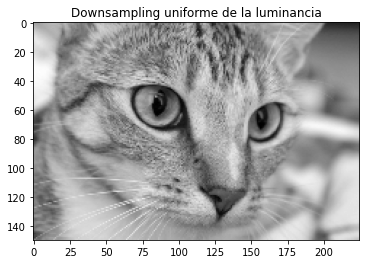

In [13]:
img3=down_un(img2)
plt.figure(1)
plt.title('Downsampling uniforme de la luminancia')
plt.imshow(img3,'gray')

Aplico un downsampling bilineal sobre la imagen.

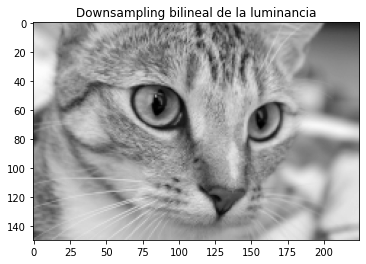

In [14]:
img4=down_bilineal(img2)
plt.figure(2)
plt.title('Downsampling bilineal de la luminancia')
plt.imshow(img4,'gray')

Aplico un downsampling cúbico sobre la imagen.

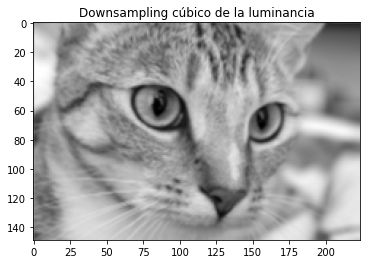

In [15]:
img5=down_cubic(img2)
plt.figure(3)
plt.title('Downsampling cúbico de la luminancia')
plt.imshow(img5,'gray')

Aplico un upsampling uniforme sobre la imagen.

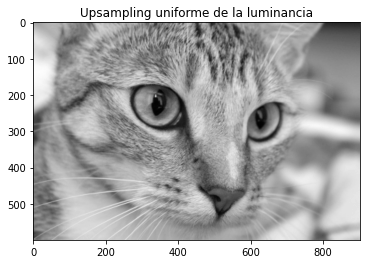

In [16]:
img6=up_un(img2)
plt.figure(4)
plt.title('Upsampling uniforme de la luminancia')
plt.imshow(img6,'gray')

Aplico un upsampling bilineal sobre la imagen.

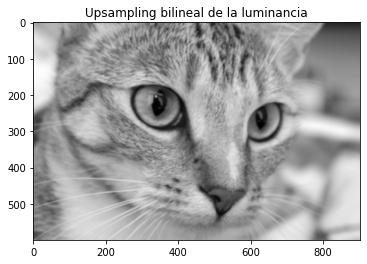

In [17]:
img7=up_bilineal(img2)
plt.figure(5)
plt.title('Upsampling bilineal de la luminancia')
plt.imshow(img7,'gray')

Aplico un upsampling cúbico sobre la imagen.

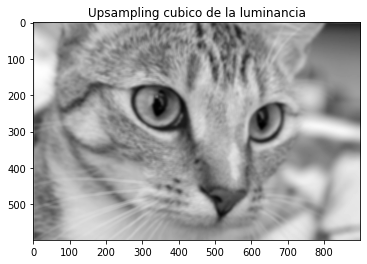

In [18]:
img8=up_cubico(img2)
plt.figure(6)
plt.title('Upsampling cubico de la luminancia')
plt.imshow(img8,'gray')

Aplico una cuantización uniforme sobre la imagen.

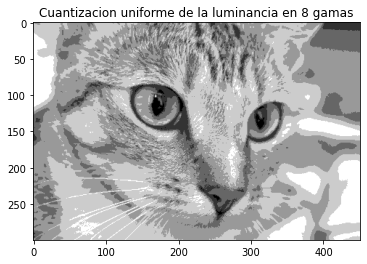

In [19]:
img9=cuant_un(img2,8)
plt.figure(7)
plt.title('Cuantizacion uniforme de la luminancia en 8 gamas')
plt.imshow(img9,'gray')
plt.imsave('cuant_un.jpg',img9,cmap='gray')

Aplico una cuantización con dithering sobre la imagen.

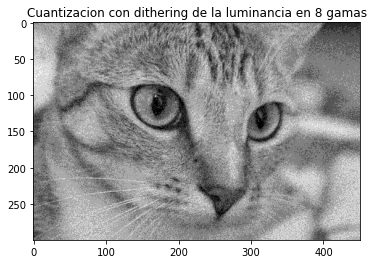

In [20]:
img10=dithering(img2,8)
plt.figure(8)
plt.title('Cuantizacion con dithering de la luminancia en 8 gamas')
plt.imshow(img10,'gray')
plt.imsave('dithering.jpg',img10,cmap='gray')

Aplico una cuantización con difusión del error sobre la imagen.

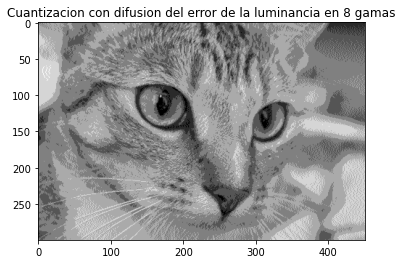

In [21]:
img11=difusion(img2,8)
plt.figure(11)
plt.title('Cuantizacion con difusion del error de la luminancia en 8 gamas')
plt.imshow(img11,'gray')
plt.imsave('difusion_error.jpg',img11,cmap='gray')